In [172]:
# First we will import our data set but before that lets import important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [173]:
#Importing dataset

used_cars = pd.read_csv("C:\\Users\\vidus\\OneDrive\\Desktop\\Used Car Analysis(car_dekho)\\Used_cars_cleaned.csv")

In [174]:
used_cars.head()

,full_name,brand_name,year,seller_type,owner_type,fuel_type,transmission_type,original_price,SP,mileage_cars(kmpl),engine_cc,maxx_power,Kmeter_driven,seat
0,Hyundai Grand i10 Asta,Hyundai,2016,Individual,First Owner,Petrol,Manual,7.48,5.50,18.90,1197,82.00,20000,5
1,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,Ford,2015,Dealer,First Owner,Diesel,Manual,13.79,5.70,22.77,1498,98.59,30000,5
2,Maruti Wagon R VXI BS IV,Maruti,2013,Individual,First Owner,Petrol,Manual,6.94,3.50,18.90,998,67.10,35000,5
3,Hyundai i10 Sportz 1.2,Hyundai,2013,Dealer,First Owner,Petrol,Manual,6.63,3.15,20.36,1197,78.90,40000,5
4,Maruti Wagon R VXI,Maruti,2018,Dealer,First Owner,Petrol,Manual,7.01,4.10,20.51,998,67.04,17512,5


# We have cleaned our dataset, 
***Now we will perform analysis inorder to get meaningful insights***

c:\Users\vidus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3750: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



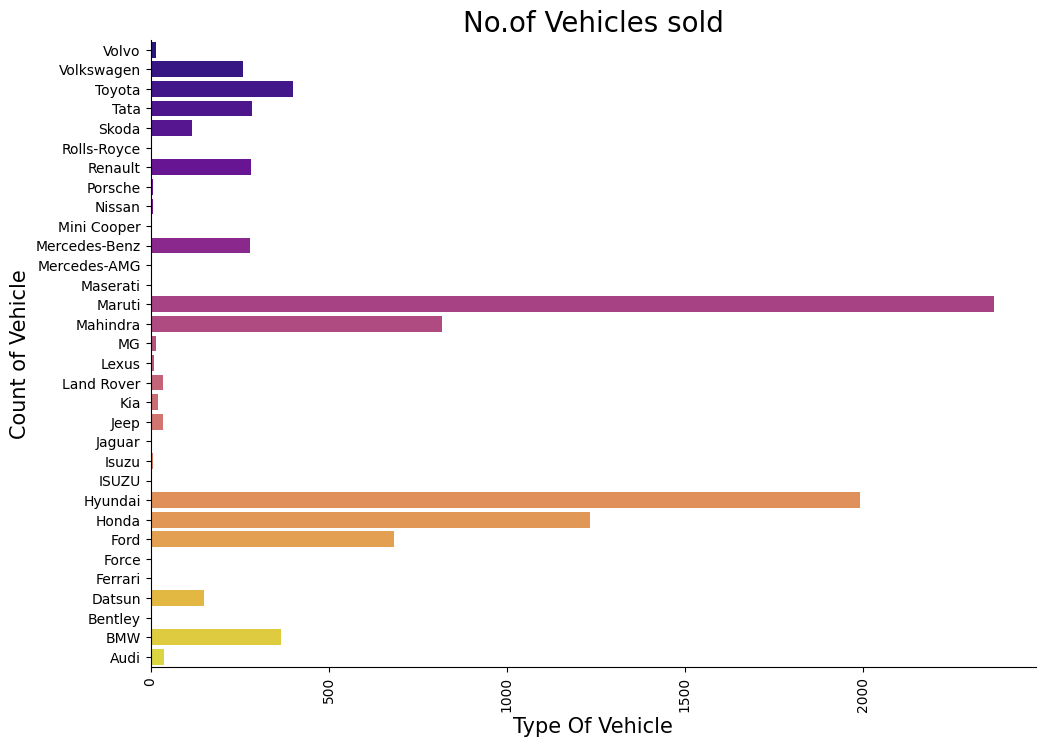

In [175]:
# Cars who have been sold most

figsize=(15,5)
brands = used_cars.sort_values(by = "brand_name",ascending= False)
sns.catplot(y = "brand_name",data = brands, kind = "count" , size=7, aspect=1.5,palette= "plasma")
plt.title("No.of Vehicles sold",fontdict= {'size':20})
plt.xlabel("Type Of Vehicle",fontdict= {'size':15})
plt.ylabel("Count of Vehicle",fontdict= {'size':15})
plt.xticks(rotation = 90)
plt.show()


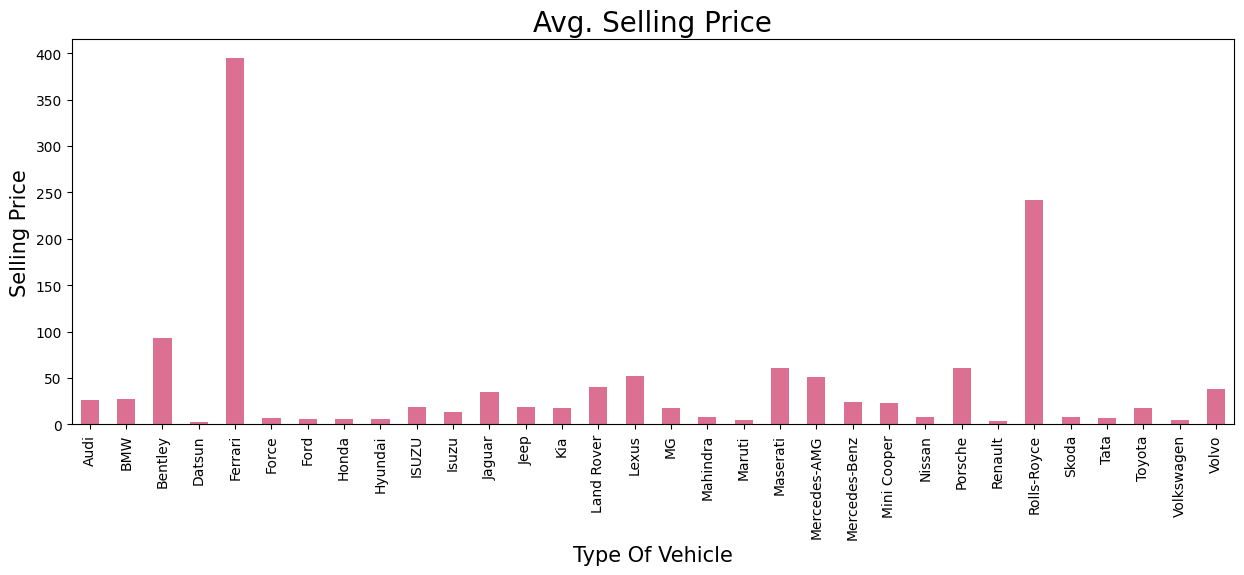

In [176]:
# Avg selling price according to Car Brands

from turtle import color

sp_avg = used_cars.groupby("brand_name")["SP"].mean().plot(kind = "bar",figsize=(15,5),color = "palevioletred")
plt.title("Avg. Selling Price",fontdict= {'size':20})
plt.xlabel("Type Of Vehicle",fontdict= {'size':15})
plt.ylabel("Selling Price",fontdict= {'size':15})
plt.xticks(rotation = 90)
plt.show()




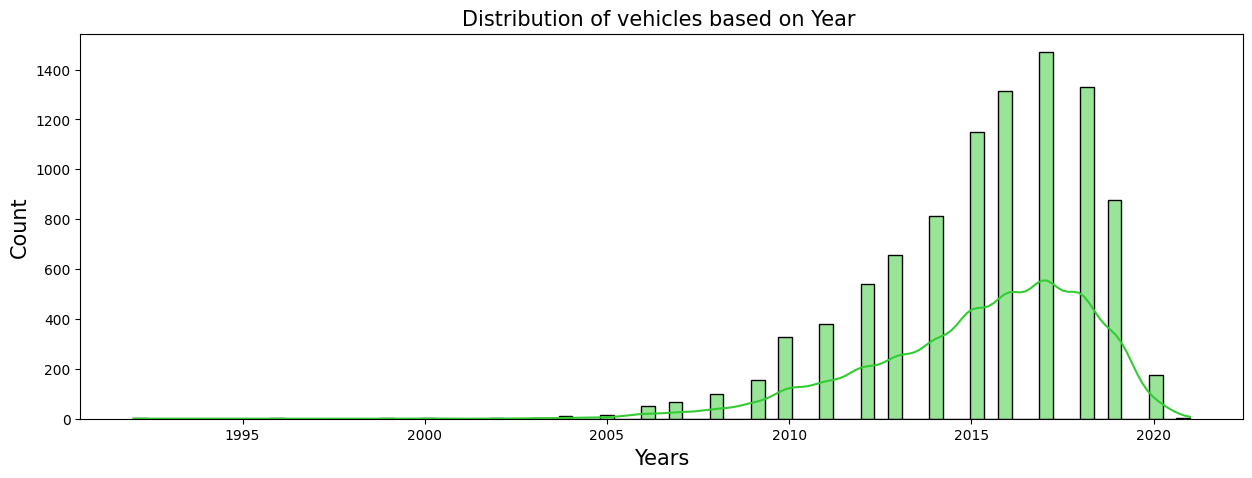

In [177]:
# Sales of vechiles on year basis 

fig, ax = plt.subplots(figsize=(15,5))
# sp = sns.(y = "year", data = used_cars)
sp = sns.histplot(used_cars["year"], color="#33cc33",kde=True ,ax=ax)
ax.set_title('Distribution of vehicles based on Year ', fontsize= 15)
plt.ylabel("Count", fontsize= 15)
plt.xlabel("Years", fontsize= 15)
plt.show()

In [195]:
# Percentage of Manual and Automatic cars 

px.pie(used_cars,values = 'Kmeter_driven',names='transmission_type')

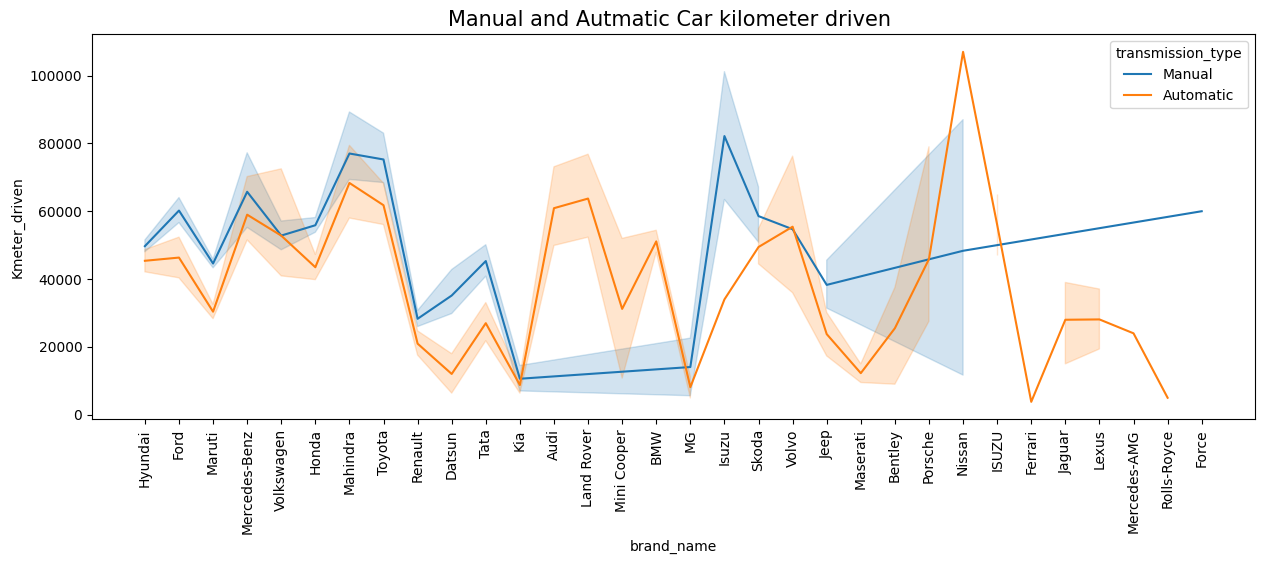

In [199]:
# Kilometer driven by car brand with respect to Transmission_type

fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(data = used_cars, x = 'brand_name', y = 'Kmeter_driven', hue = 'transmission_type')
plt.xticks(rotation = 90)
ax.set_title('Manual and Autmatic Car kilometer driven ', fontsize= 15)
plt.show()


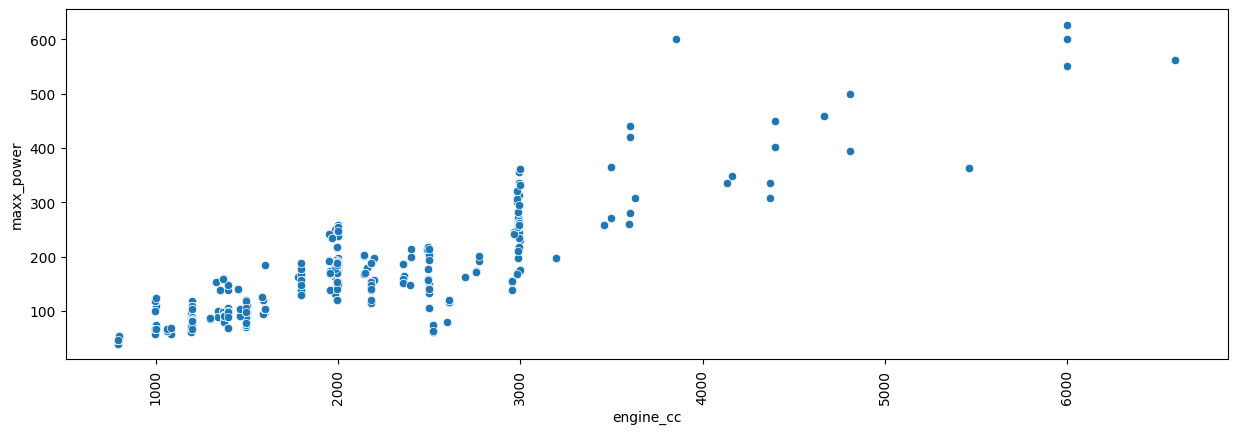

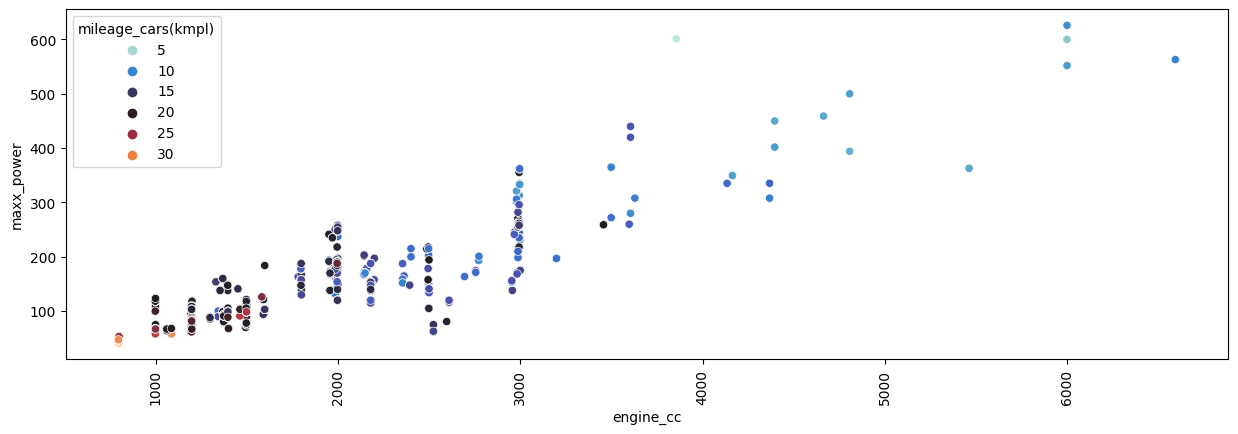

In [201]:
#  Graph 1 - Relationship between maxx power and engine 
#  Graph 2 - Relationship between maxx power and engine with respect to Mileage


fig, ax = plt.subplots(figsize=(15,10))

plt.subplot(2,1,1)
sns.scatterplot(data = used_cars, x = "engine_cc", y = "maxx_power", palette='pink_r')
plt.xticks(rotation = 90)

fig, ax = plt.subplots(figsize=(15,10))
plt.subplot(2,1,2)
sns.scatterplot(data = used_cars, x = "engine_cc", y = "maxx_power",hue ="mileage_cars(kmpl)" , palette='icefire')
plt.xticks(rotation = 90)

plt.show()

<AxesSubplot:xlabel='fuel_type', ylabel='count'>

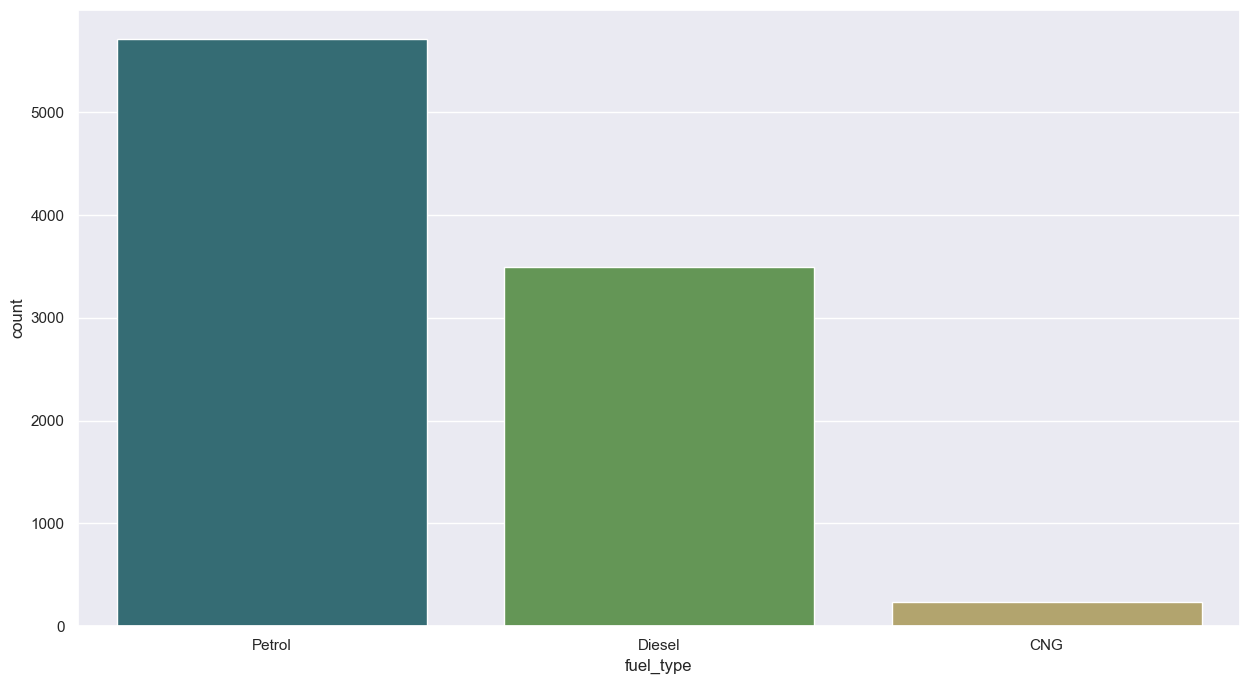

In [315]:
# Count of fuel type

sns.countplot(data = used_cars, x = 'fuel_type', palette= 'gist_earth')

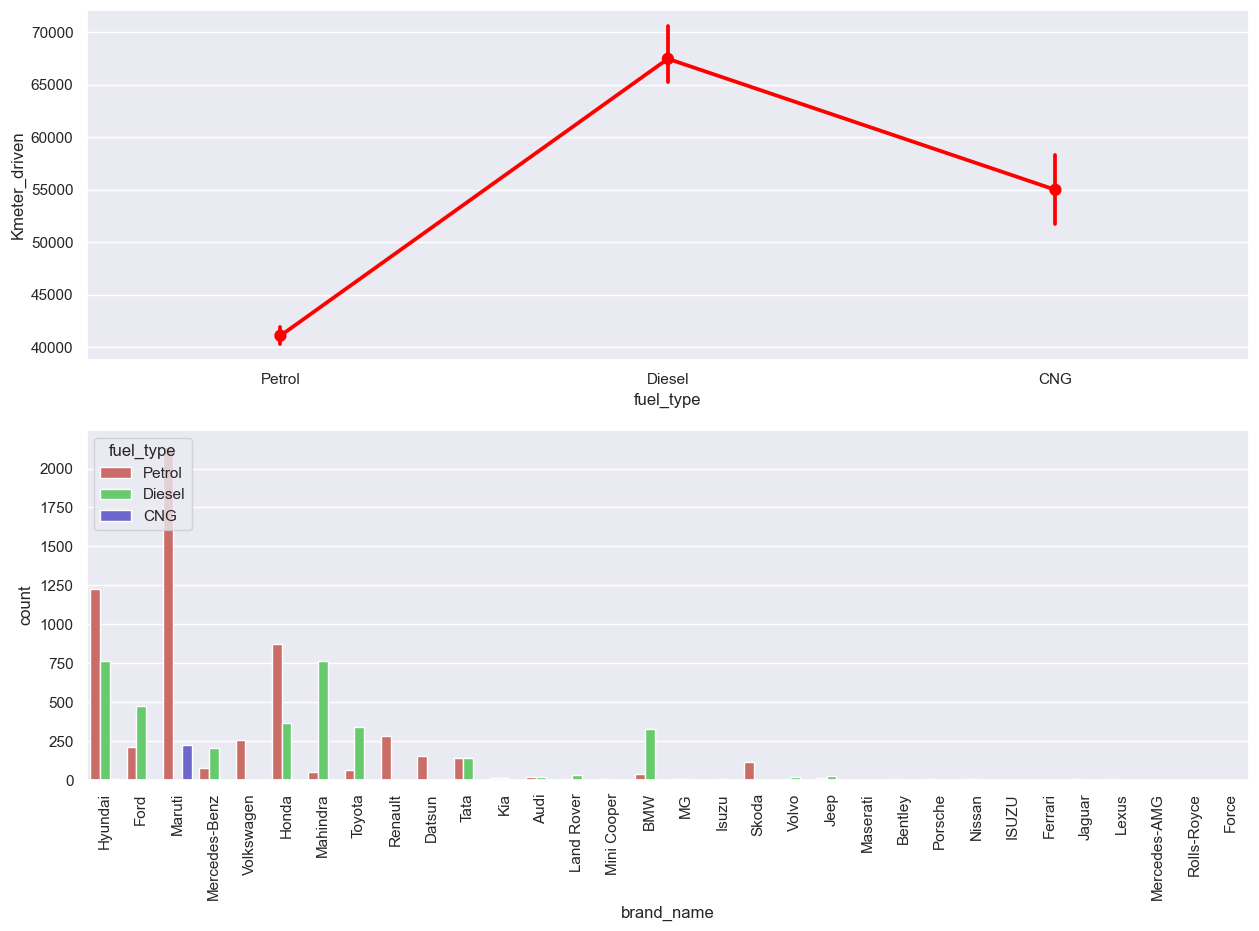

In [379]:
# Kilometer driven using various types of fuel
# Count of fuel type of various brands

fig, ax = plt.subplots(figsize=(15,10))
plt.subplot(2,1,1)
sns.pointplot(x = 'fuel_type',y = 'Kmeter_driven', data = used_cars, kind = 'hist', color= 'red')

plt.subplot(2,1,2)

sns.countplot(data = used_cars, x = 'brand_name', hue = 'fuel_type', palette = 'hls' )
plt.xticks(rotation = 90)




plt.show()

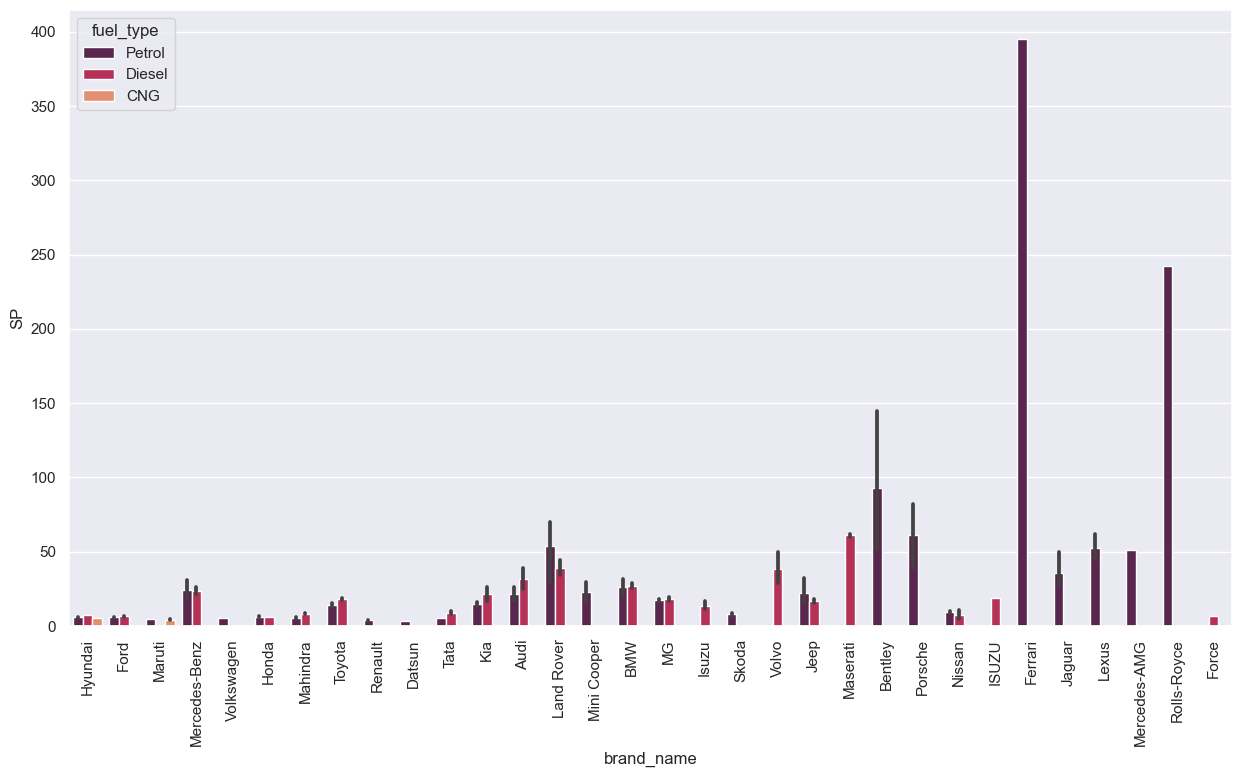

In [378]:

# Selling price with respect to fuel type of various brands 

sns.barplot( data = used_cars, x = 'brand_name', y = 'SP', hue = 'fuel_type', palette='rocket')
plt.xticks(rotation = 90)
plt.show()

In [204]:
# relationship b/w maximum power and engine cc with respect to selling price

px.scatter(used_cars, x = 'engine_cc', y = "maxx_power",color = 'SP')

Text(0.5, 1.0, 'Distribution of Manual and Automatic cars')

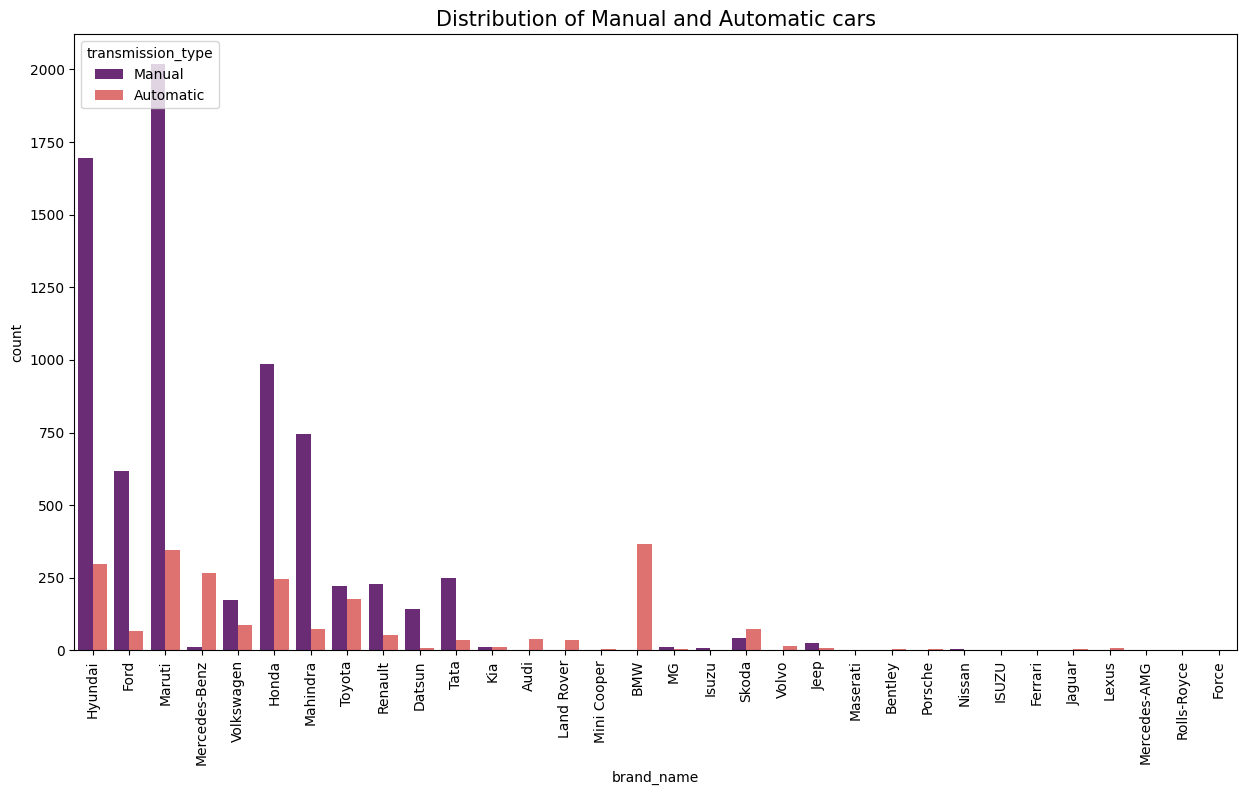

In [226]:
# Manual and Automatic cars of different brands

fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(data = used_cars, x = 'brand_name',hue = 'transmission_type',palette= 'magma')
plt.xticks(rotation = 90)
plt.title('Distribution of Manual and Automatic cars',fontsize = 15)


In [376]:
#  Difference b/w original price and selling price of Each brand's Avg price

avg = used_cars.groupby('brand_name', as_index=False).mean()
fig = go.Figure()
fig.add_trace(go.Scatter( x = avg['brand_name'], y = avg['original_price'], name="Org Price"))
fig.add_trace(go.Bar( x = avg['brand_name'], y = avg['SP'], name = 'Sell price'))
fig.update_layout(title_text='Difference b/w Original price and Selling price ',  plot_bgcolor='wheat', height = 800)


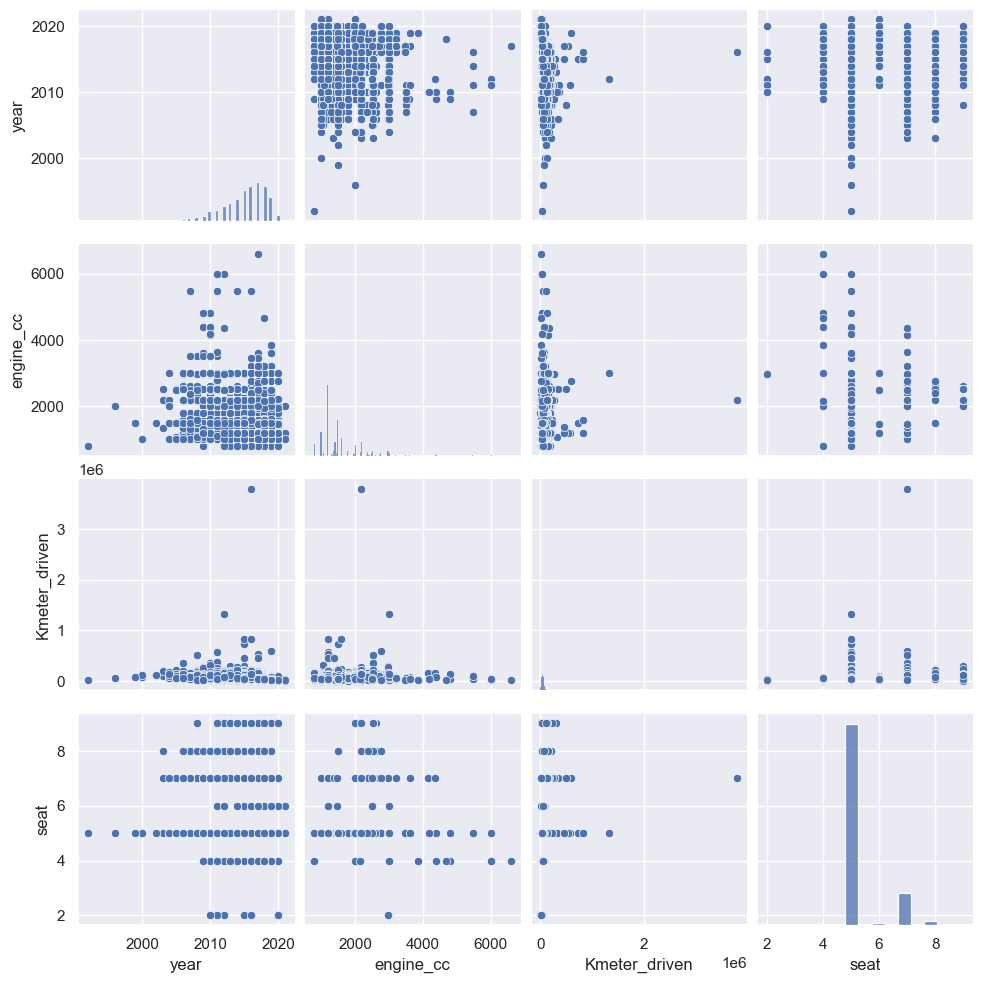

In [382]:
#  pairwise relationship between integer variables in a dataset

sns.pairplot(used_cars.select_dtypes(include=['int']))
